## DSC530
### Xin Tang
### Term Project

### dataset description:
 This is a dataset from Kaggle.com. It contains the used car sale info from various location in country of Pakistain. The data has 14 columns and more than 46K  sales records.
 

### Task 1&2 : pick 5 variables and describle them.
   The 5variables are: 
   1. Company Name:  the car manufactuer company name
   2. Model Name:    the car model name
   3. Price:         the car sale price
   4. Model Year:    The year car was originally made
   5. mileage:       The car mileage at moment of sales
   
   There are other variables like Engine type will be used to do analysis. 

### Task 3: plot histogram of the 5 variables and identify outliner. how the outliner will be handled. 

### import data

In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import thinkstats2
import thinkplot
from scipy import stats

#filePath = 'C:\\Users\\Daisy\\Documents\\Xin\\Data science\\DSC530\\new data\\new data car price\\'
#fileName = 'Clean Data_pakwheels.csv'
#completename = filePath + fileName
#df = pd.read_csv(completename)
df = pd.read_csv('Clean Data_pakwheels.csv')

### explore the data and check unique values. 

In [3]:
cols = df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
print(Unique_Values())
df.info()
print('variables with NA values', df.isna().sum())

There are 46022 of unique values in ID column out of 46022
There are 31 of unique values in Company Name column out of 46022
There are 196 of unique values in Model Name column out of 46022
There are 1419 of unique values in Price column out of 46022
There are 30 of unique values in Model Year column out of 46022
There are 6 of unique values in Location column out of 46022
There are 5573 of unique values in Mileage column out of 46022
There are 3 of unique values in Engine Type column out of 46022
There are 75 of unique values in Engine Capacity column out of 46022
There are 24 of unique values in Color column out of 46022
There are 2 of unique values in Assembly column out of 46022
There are 6 of unique values in Body Type column out of 46022
There are 2 of unique values in Transmission Type column out of 46022
There are 2 of unique values in Registration Status column out of 46022
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 

### the dataset is clean with no empty values. 

### Start to plot the histogram, Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails 

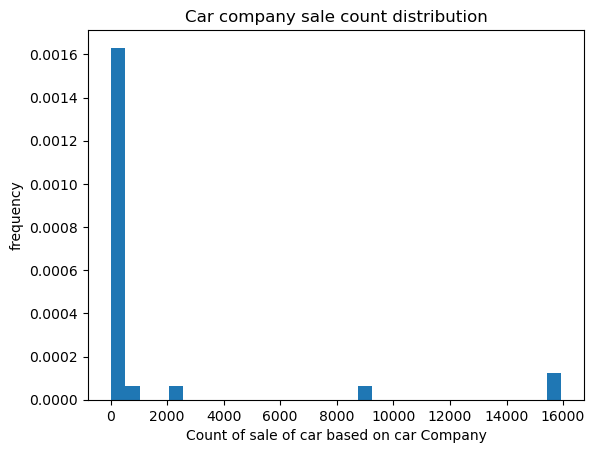

In [4]:
company_name = df['Company Name'].value_counts()
plt.hist(company_name, bins =31, density=True)
plt.xlabel('Count of sale of car based on car Company')
plt.ylabel('frequency')
plt.title('Car company sale count distribution')
plt.show()

The histogram shows that the car sale based on company is not symmetric, no obvious spread or tail. a few companies made most sales (>16000 sales) and most companies made very few sales (<2000 sales)

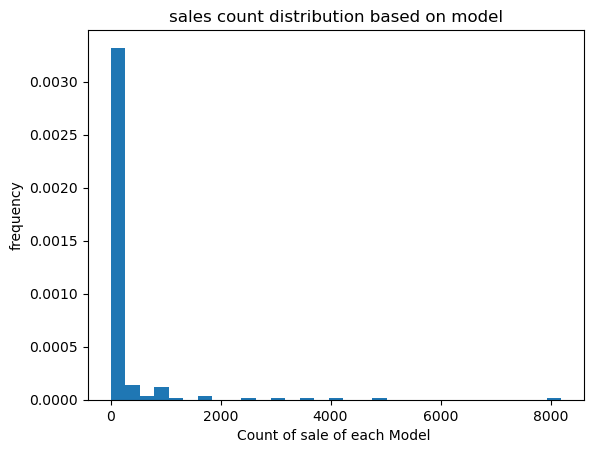

In [11]:
model_name = df['Model Name'].value_counts()
plt.hist(model_name, bins =31, density=True)
plt.xlabel('Count of sale of each Model ')
plt.ylabel('frequency')
plt.title('sales count distribution based on model')
plt.show()

The histogram shows that the car sale based on model is a right skewed narrow bell shaped distribution with long tail. it is possible a pareto distribution.

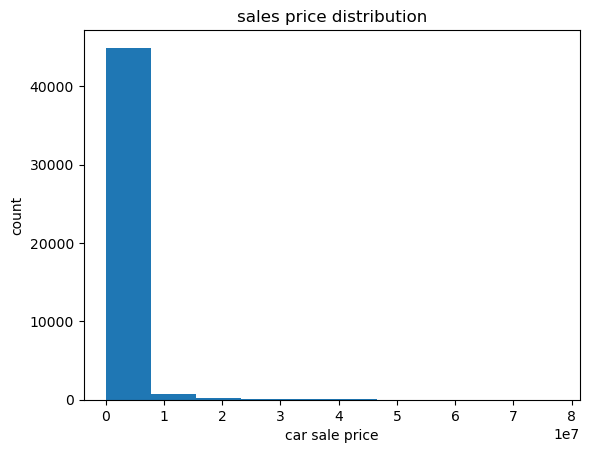

In [8]:
plt.hist(df['Price'])
plt.xlabel('car sale price')
plt.ylabel('count')
plt.title('sales price distribution')
plt.show()

The histogram shows that the car sale price is a right skewed narrow bell shaped distribution with long tail, likely a pareto distibution.

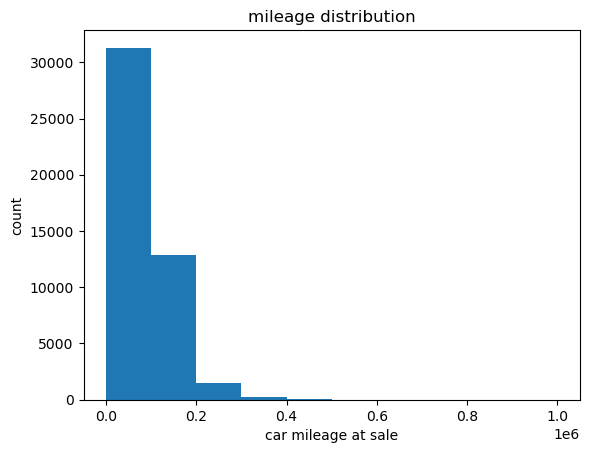

In [32]:
plt.hist(df['Mileage'])
plt.xlabel('car mileage at sale')
plt.ylabel('count')
plt.title('mileage distribution')
plt.show()

The histogram shows that the car milage at sales is a right skewed narrow bell shaped distribution with long tail, likely a pareto distibution.

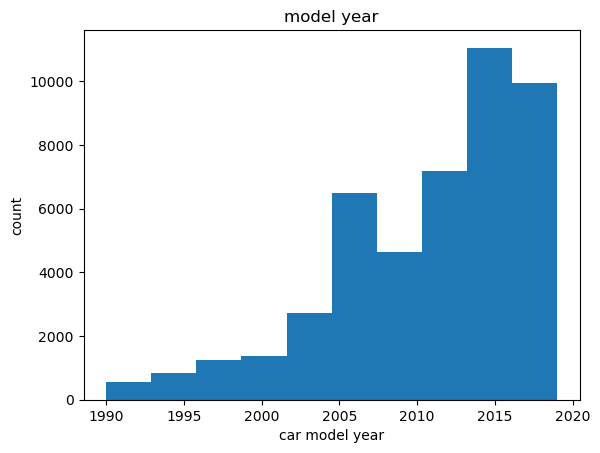

In [33]:
plt.hist(df['Model Year'])
plt.xlabel('car model year')
plt.ylabel('count')
plt.title('model year')
plt.show()

The histogram shows that the used car model year is a left skewed bell shaped distribution with left tail and bi-tips.

In [12]:
print('mean value of car company count is', company_name.mean())
print('mean value of car model type count is', df['Model Name'].value_counts().mean())
print('mean value of sale price is', df['Price'].mean())
print('mean value of mileage is', df['Mileage'].mean())
print('mean value of car model year is',  int(df['Model Year'].mean()))

mean value of car company count is 1484.5806451612902
mean value of car model type count is 234.80612244897958
mean value of sale price is 2014153.2310634044
mean value of mileage is 90965.12824301422
mean value of car model year is 2011


In [13]:
print('median of car company count is', company_name.mode())
print('median value of car model type count is', df['Model Name'].value_counts().mode())
print('median value of sale price is', df['Price'].mode())
print('median value of mileage is', df['Mileage'].mode())
print('median value of car model year is',  df['Model Year'].mode())


median of car company count is 0    1
Name: Company Name, dtype: int64
median value of car model type count is 0    1
Name: Model Name, dtype: int64
median value of sale price is 0    650000
Name: Price, dtype: int64
median value of mileage is 0    100000
Name: Mileage, dtype: int64
median value of car model year is 0    2017
Name: Model Year, dtype: int64


### now checking outliner

Text(0, 0.5, 'sale count')

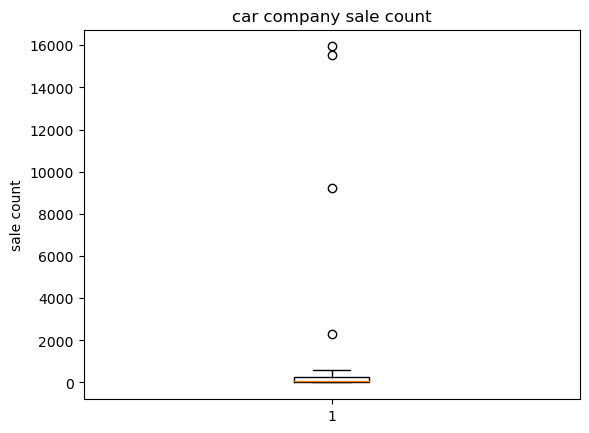

In [44]:
plt.boxplot(company_name)
plt.title('car company sale count')
plt.ylabel('sale count')

Most car companies made <2000 sales, those 4 companies made more sales look like outliners. However, all sales are valid. so I would like to separate the companies with most sales. (in this case, Toyota and Suzuki made 68.5% sales) from the rest and do analysis. 

Text(0, 0.5, 'sale count')

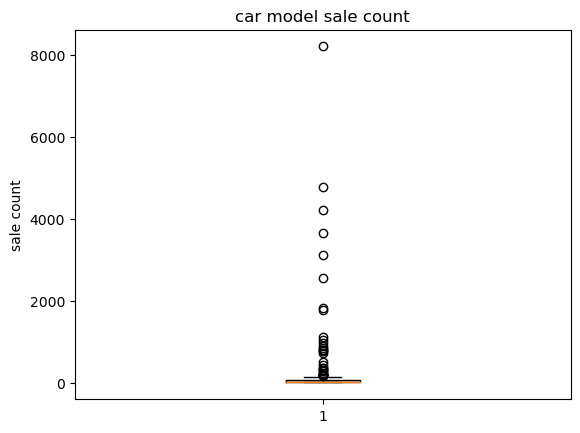

In [47]:
plt.boxplot(model_name)
plt.title('car model sale count')
plt.ylabel('sale count')

the mode of car model based on sale count is 1. from box plot it is also shown most model made <2000 sales, one model (Toyota corrola) made >8000 sales look like an outliners. However, this is an indication of a popular car type. so I could focus on car models made more than 2000 sales only.

Text(0, 0.5, 'price in US$')

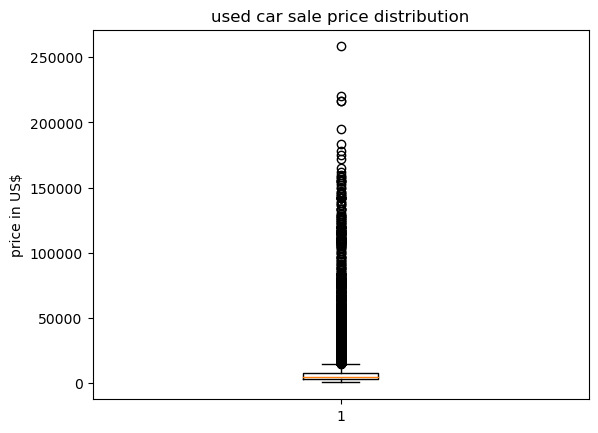

In [53]:
#convert price to US $ value
df['NewPrice'] = df['Price']/300
plt.boxplot(df['NewPrice'])
plt.title('used car sale price distribution')
plt.ylabel('price in US$')

There is a car sold for USD >250K, also a few sold for ~USD 200K, they looks like outliners. I plan to remove them for future analysis. 

Text(0, 0.5, 'mileage')

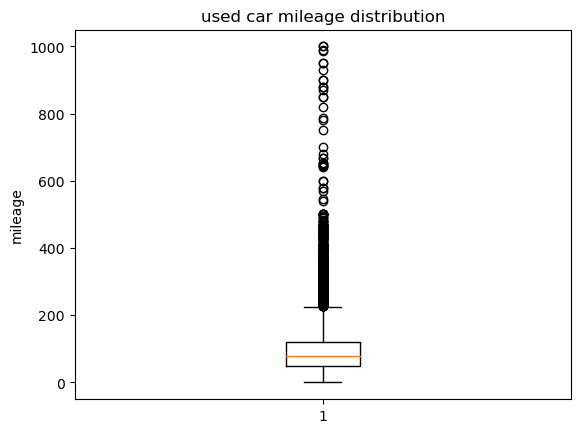

In [57]:
#convert mileage to make high mileage more readable
plt.boxplot( df['Mileage']/1000)
plt.title('used car mileage distribution')
plt.ylabel('mileage')

most cars have mileage less than 500K. Since it is in pakistan, so it maybe okay to buy cars with extreme mileage. so unless further investigation, I will not consider any as outliner.

Text(0, 0.5, 'year')

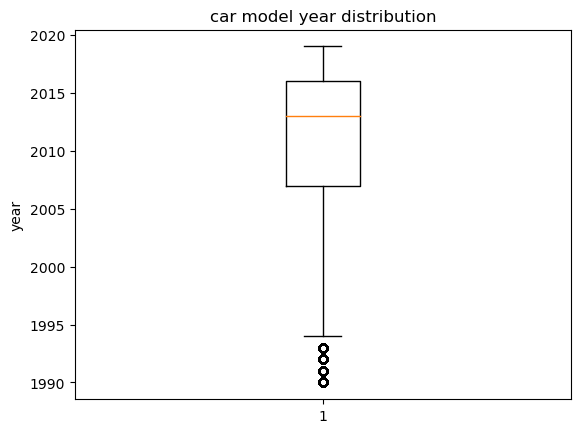

In [58]:
plt.boxplot( df['Model Year'])
plt.title('car model year distribution')
plt.ylabel('year')

though box plot shows car older than 1995 are outliner. Since it is in pakistan, so it maybe okay to buy very old cars. Unless further investigation, I will not consider any years as outliner.

### Task 4. Compare two scenarios in your data using a PMF
 Based on the analysis before, I would like to use Engine capacity on Corrola as dataset and compare difference on PMF based on the tranmission types (auto vs manual)

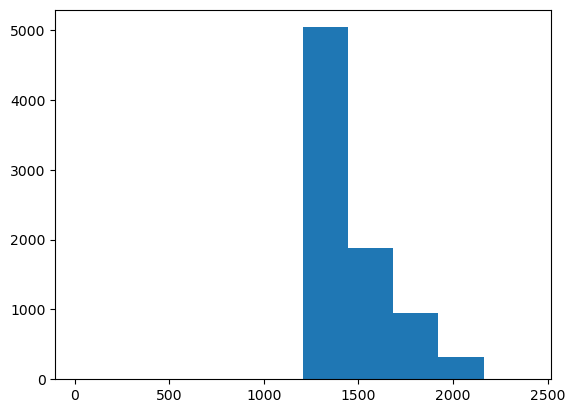

In [55]:
#create subdataset with converted price as USD
Corrola = df[df['Model Name'] == 'Corolla']
Cengine = Corrola[['Engine Capacity', 'Transmission Type']]
plt.hist(Cengine['Engine Capacity'])
plt.show()

In [97]:
auto = Cengine[Cengine['Transmission Type'] == 'Automatic']
aengine = auto['Engine Capacity']
manual = Cengine[Cengine['Transmission Type'] == 'Manual']
mengine = manual['Engine Capacity']

In [98]:
# create pmf
auto_pmf = thinkstats2.Pmf(aengine, label='auto transmission')
manual_pmf = thinkstats2.Pmf(mengine, label='manual')
#plt.hist(manual_pmf, density = 'TRUE')
#thinkplot.Hist(auto_pmf)

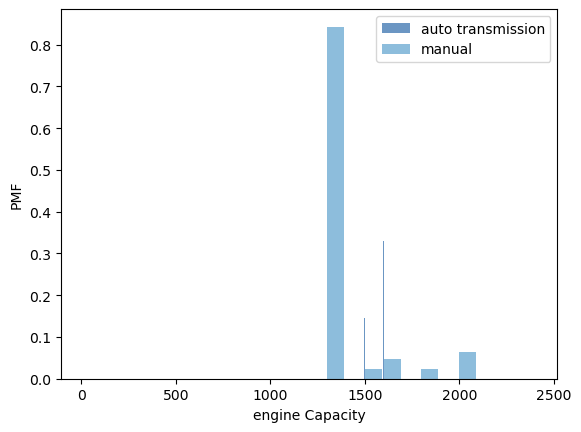

In [85]:
#plot pmf
thinkplot.PrePlot(2)
thinkplot.Hist(auto_pmf, align='right')
thinkplot.Hist(manual_pmf, align='left')
thinkplot.Config(xlabel='engine Capacity', ylabel='PMF')

Since Engine type are discrete values and there are dominant capacities (like 84% of manual version has 1300 capacity), so there are not much overlap of engine capacity. it do show the auto and manual tranmission have quite different engine capacity distribution

### Task 5. Create 1 CDF with one of your variables. what does this tell you about your variable?

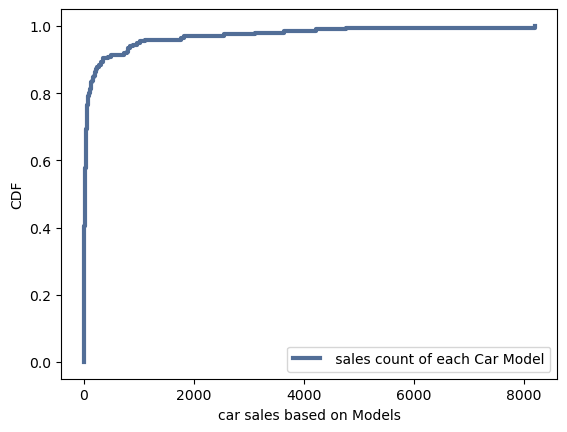

80.1 percent of models are with sales <100
models with sales >2000 are better than 96.94 % of models


<Figure size 800x600 with 0 Axes>

In [41]:
model = df['Model Name']
sales_count = model.value_counts()
cdf = thinkstats2.Cdf(sales_count, label=' sales count of each Car Model')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='car sales based on Models', ylabel='CDF')
print(round(cdf.PercentileRank(100),2),'percent of models are with sales <100')
print('models with sales >2000 are better than', round(cdf.PercentileRank(2000),2), '% of models' )

CDF chart shows the sales is not a normal distribution. below 100 is a almost stright vertical lines, indicate it is common that most car models do not make many sales. 
Further caluclation shows that 80% of the model are with sales below 100. On the other hand, if a car makes 2000 sales or more, it is ranked top 3%. In other words, people there only buy a few models.

### Task 6. Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen.

From above CDF chart, it looks like the car sales based on model is a pareto distribution. I would like to take some samples and plot the pareto distribution, validate if it fits. 

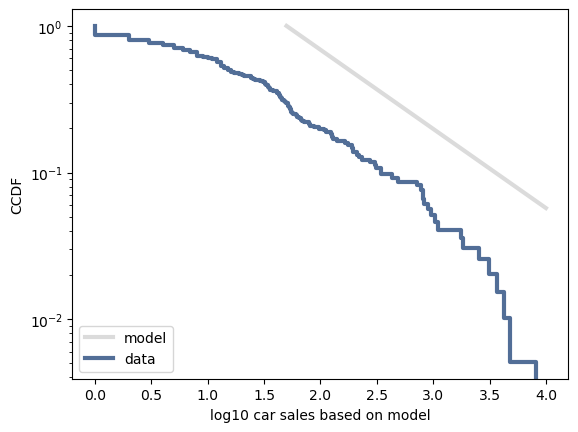

In [53]:
log_sales = np.log10(sales_count)
cdf = thinkstats2.Cdf(sales_count, label="data")
cdf_log = thinkstats2.Cdf(log_sales, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=50, alpha=0.54, low=0, high=1e4)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 car sales based on model", ylabel="CCDF", yscale="log", loc="lower left")

The pareto distribution has a slope very similar to the slope of CDF of log scale of car sales. the position is shifted but slope fit. so I believe the model based car sales is a pareto distribution.  

### Task 6 Create two scatter plots comparing two variables and provide your analysis on correlation and causation. check covariance, Pearson’s correlation, and Non-Linear Relationships 

In [5]:
# check corrlation of all variables. 
df.corr().style.background_gradient(cmap='cividis')

C:\Users\Daisy\AppData\Local\Temp\ipykernel_21496\4240556666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='cividis')


,ID,Price,Model Year,Mileage,Engine Capacity
ID,1.000000,-0.012383,-0.032425,-0.009007,-0.011992
Price,-0.012383,1.000000,0.217494,-0.188658,0.645924
Model Year,-0.032425,0.217494,1.000000,-0.604310,-0.151290
Mileage,-0.009007,-0.188658,-0.604310,1.000000,0.098138
Engine Capacity,-0.011992,0.645924,-0.151290,0.098138,1.000000


looks like engine capacity vs price has strong correlation. Create scatter plot for these 2 variables. then use mileage vs Price to ceate a continuous variable scatter plot. 

Text(0, 0.5, 'Price in US$')

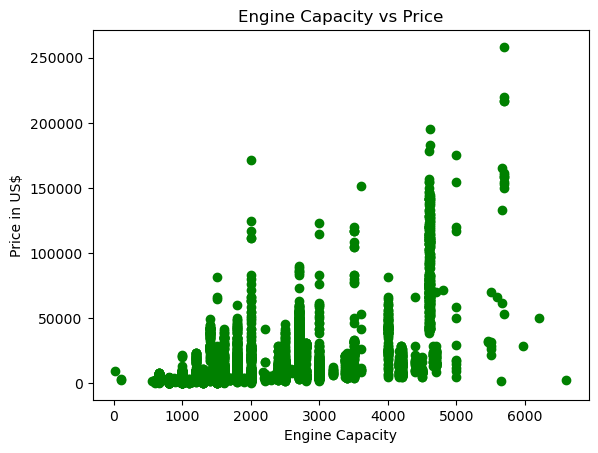

In [17]:
x1 = df['Engine Capacity']
y1 = df['Price']/300
plt.ticklabel_format(axis='both', style='sci', useLocale= True)
plt.scatter(x1, y1, color = 'green')
plt.title('Engine Capacity vs Price')
plt.xlabel('Engine Capacity')
plt.ylabel('Price in US$')

Text(0, 0.5, 'Price in US$')

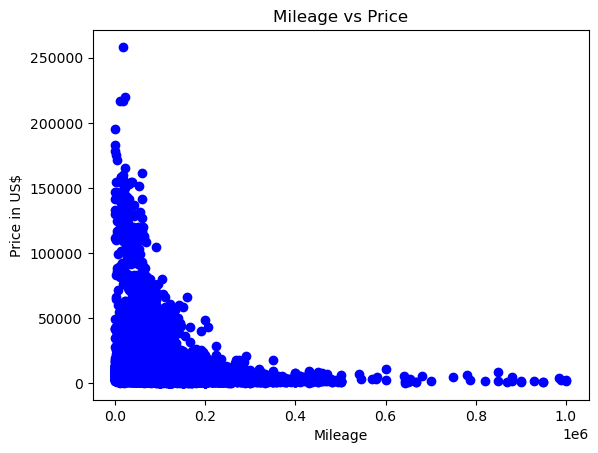

In [20]:
x2 = df['Mileage']
y2 = df['Price']/300
plt.ticklabel_format(axis='x', style='sci', useLocale= True)
plt.scatter(x2, y2, color = 'blue')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price in US$')